In [13]:
#===== IMPORTS ================================================================
import numpy as np
import pandas as pd
import json 
import matplotlib.pyplot as plt
import pprint

<h1>2. Datenvorverarbeitung mit Pandas: Food Nutrient Database<h1>

a) Laden Sie die Datenbank als zip-File aus Moodle herunter und lesen Sie dieses File direkt in ein neues Notebook ein. Die bisher verwendete Pandas-Methode read_csv() funktioniert für JSON-Files leider nicht. Das heruntergeladene File wird stattdessen mithilfe des Py- thonmoduls zipfile entpackt und dem Python-Befehl open() eingelesen. Die Umwandlung des JSON-Formates in ein geeignetes Python-Format erfolgt mit einem weiteren Modul der Python-Standardlibrary, json, hier mithilfe der Funktion json.load(). Lesen Sie dazu die zugehörigen, auf dem Web bzw. Stackoverflow verfügbaren Anleitungen.

In [14]:
with open("foods.json", "r") as food_file:
    food_data = json.load(food_file)

b) Die Datenbank steht nun in Form einer Liste aus 6636 Python-Dictionaries zu Verfügung. Jedes Dictionary enthält Angaben zu einem Nahrungsmittel. Greifen Sie sich ein beliebiges Nahrungsmittel heraus und lassen sich die Namen der Einträge mit der Methode dict.keys() anzeigen. Einer der Einträge enthält die enthaltenen Nährstoffe (nutrients), ebenfalls als Dictionary. Lassen Sie sich wiederum einen beliebigen Eintrag der Nährstoffliste anzeigen. Es sollte auffallen, dass manche Feldnamen doppelt vorkommen.

In [15]:
food_data[1].keys()
nutrients = food_data[5]['nutrients']
# food_data[5] hat Ash als doppelten Eintrag
pprint.pprint(nutrients)



[{'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.72},
 {'description': 'Protein',
  'group': 'Composition',
  'units': 'g',
  'value': 25.96},
 {'description': 'Total lipid (fat)',
  'group': 'Composition',
  'units': 'g',
  'value': 20.03},
 {'description': 'Carbohydrate, by difference',
  'group': 'Composition',
  'units': 'g',
  'value': 3.83},
 {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.72},
 {'description': 'Energy', 'group': 'Energy', 'units': 'kcal', 'value': 302.0},
 {'description': 'Alcohol, ethyl',
  'group': 'Other',
  'units': 'g',
  'value': 0.0},
 {'description': 'Water', 'group': 'Composition', 'units': 'g', 'value': 46.46},
 {'description': 'Caffeine', 'group': 'Other', 'units': 'mg', 'value': 0.0},
 {'description': 'Theobromine', 'group': 'Other', 'units': 'mg', 'value': 0.0},
 {'description': 'Energy', 'group': 'Energy', 'units': 'kJ', 'value': 1262.0},
 {'description': 'Sugars, total',
  'group': 'Composition',
  'units': 'g',

- Kopieren Sie zunächst die Felder description,group,id,manufacturer in einen eigenen DataFrame info, sowie alle Nährstofflisten in ein Array von DataFrames, wobei Sie an jeden DataFrame die entsprechende ID des Nahrungsmittels als eigene Spalte anhängen.

In [16]:
## Create Dataframe with Indexs
data = {
    "description" : [],
    "group" : [],
    "id" : [],
    "manufacturer" : []
}

for food in food_data:
    data["description"].append(food["description"])
    data["group"].append(food["group"])
    data["id"].append(food["id"])
    data["manufacturer"].append(food["manufacturer"])

info = pd.DataFrame(data, columns=["description", "group", "id", "manufacturer"])

## Create Array of dataframes with nutrient list
food_nutrients = []

for food in food_data:

    nu_cache = {
    "description" : [],
    "group" : [],
    "units" : [],
    "value" : []
    }

    for nutrient in food["nutrients"]:
        nu_cache["description"].append(nutrient["description"])
        nu_cache["group"].append(nutrient["group"])
        nu_cache["units"].append(nutrient["units"])
        nu_cache["value"].append(nutrient["value"])

    element = pd.DataFrame(nu_cache, columns=["description", "group", "units", "value"])
    element["id"] = food["id"]
    food_nutrients.append(element)


- Dieses Array wird mithilfe der Funktion pandas.concat() zu einem großen DataFrame nutrients (389355 Einträge) vereinigt.

In [17]:
## Concat the both
nutrients = pd.concat(food_nutrients)
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


- Entfernen Sie alle Duplikate aus diesem DataFrame.

In [18]:
## Drop all duplicates
nutrients = nutrients.drop_duplicates()
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


- Bevor beide DataFrames vereinigt werden können, gibt es noch ein Problem: beide enthalten Felder mit dem Namen description und group (s.o.). Benennen Sie diese daher mithilfe von DataFrame.rename() in eindeutige Namen um.

In [19]:
info = info.rename(columns={
    "description": "food_description",
    "group": "food_group"
})

nutrients = nutrients.rename(columns={
    "description": "nutrient_description",
    "group": "nutrient_group"
})
nutrients.head()

,nutrient_description,nutrient_group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


- Vereinigen Sie beide DataFrames mit pandas.merge(nutrients, info, on=’id’, how=’outer’) anhand der Nahrungsmittel-ID.

In [20]:
full_data_set = pd.merge(nutrients, info, on="id", how="outer")
full_data_set.head()

,nutrient_description,nutrient_group,units,value,id,food_description,food_group,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


c) Nun sind die Daten bereit für die Untersuchung auf das Spurenelement Zink (Feldname: Zinc, Zn). Lesen Sie dazu alle Tabelleneinträge mithilfe einer geeigneten Indizierung in einen DataFrame aus, der nur Einträge zum Nährstoff Zink enthält. Daraus wählen Sie wiederum die Spalte mit dem Zinkgehalt in mg (value) aus und stellen dafür ein Histogramm und eine Liste deskriptiver Statistiken dar. Finden Sie in Ihrer Tabelle Edamer (Cheese, edam). Hat Edamer einen überdurchschnittlichen Zinkgehalt? Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt? Welches Nahrungsmittel hat den maximalen Zinkgehalt?

In [23]:
## Read Zink data
zink_data = full_data_set.loc[full_data_set["nutrient_description"] == "Zinc, Zn"]

## Make statistics with the zinc data
print(f"Descriptic Stats:")
print(zink_data["value"].describe())
print("Every value in mg\n\n")

Descriptic Stats:
count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64
Every value in mg




In [24]:
## Search for Edamer
edam = zink_data.loc[zink_data["food_description"] == "Cheese, edam"]
print(f"\nEdammer Stats:\n{edam.drop_duplicates()}\n\n")


Edammer Stats:
    nutrient_description nutrient_group units  value    id food_description  \
151             Zinc, Zn       Elements    mg   3.75  1018     Cheese, edam   

                 food_group manufacturer  
151  Dairy and Egg Products               




In [25]:
## Search for max value
max_index = zink_data["value"].idxmax()
max_entry = zink_data.loc[max_index]

print("\n\nFood with max Zinc value:")
print(max_entry)



Food with max Zinc value:
nutrient_description                             Zinc, Zn
nutrient_group                                   Elements
units                                                  mg
value                                               90.95
id                                                  15170
food_description        Mollusks, oyster, eastern, canned
food_group                 Finfish and Shellfish Products
manufacturer                                             
Name: 333726, dtype: object


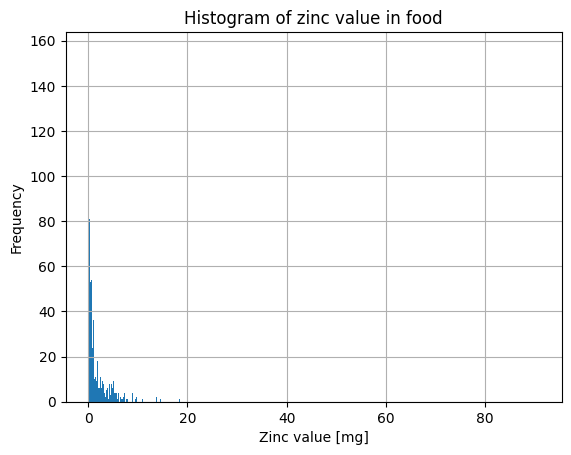

In [28]:
## Create Hist
zink_data["value"].hist(bins=len(zink_data["value"]))
plt.xlabel('Zinc value [mg]')
plt.ylabel('Frequency')
plt.title('Histogram of zinc value in food')
plt.show()